## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('talk')

We will be using the MIT Beth Israel Hospital (BIH) electrocardiogram dataset for the model comparison. This dataset contains about 110,000 labeled data points. Each sample is annotated as either normal (0), supraventricular premature beat (1), premature ventricular contraction (2), fusion of ventricular and normal beat (3), and finally unclassifiable beat (4). The ECGs were recorded at a frequency of 360 Hz. Thus, each sample was taken over 0.52 seconds since there are 187 measurements per sample. Data was downloaded from kaggle and can be found here: https://www.kaggle.com/shayanfazeli/heartbeat. A description of the data and the sampling procedure used can be found at the data's source: https://www.physionet.org/content/mitdb/1.0.0/.

In [2]:
mit_train = pd.read_csv('./data/mitbih_train.csv', header=None)
mit_test = pd.read_csv('./data/mitbih_test.csv', header=None)

The data is already cleaned and preprocessed for us making our lives much easier.

In [3]:
y_train = mit_train[187]
X_train = mit_train.loc[:, :186]

In [4]:
print(f"Train shape: {mit_train.shape}")
print(f"Test shape: {mit_test.shape}")

Train shape: (87554, 188)
Test shape: (21892, 188)


188 columns come from 187 equally spaced measurements of the heartbeat and one label column.

In [5]:
# Proportions of each class
round(mit_train[187].value_counts(normalize=True).sort_index(), 2)

0.0    0.83
1.0    0.03
2.0    0.07
3.0    0.01
4.0    0.07
Name: 187, dtype: float64

We can see that most of the samples are normal (0). The arrythmias are much less represented in the dataset. Hopefully, our model will still be able to make these classifications and do better than the baseline accuracy of 83%.

Let's take a look at a few examples from each class.

Disclaimer: I am not a cardiologist. These observations are purely qualitative.

In [6]:
def plot_class(label, num_samples):
    sns.lineplot(data=X_train.loc[y_train == label].sample(num_samples).T)
    plt.title(f"Class {label} examples")
    plt.xlabel("Time")
    plt.show()

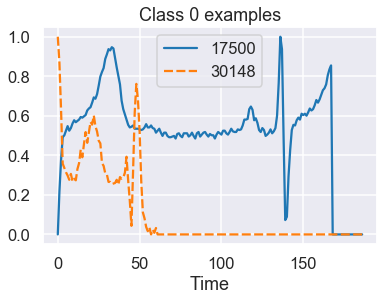

In [7]:
plot_class(0, 2)

Normal heartbeats. Sharp dropoff at beginning followed by small peak. Then, narrow spike before flatline.

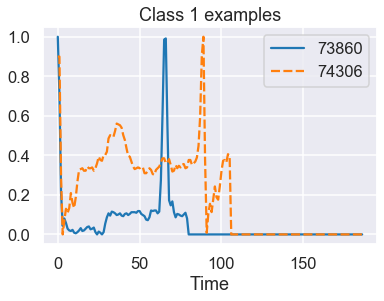

In [8]:
plot_class(1, 2)

Supraventricular premature beat, otherwise known as class 1. More activity before main peak. After the main spike there is another bump.

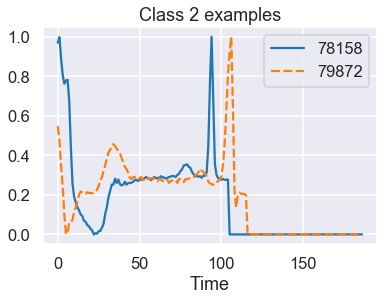

In [9]:
plot_class(2, 2)

Premature ventricular contraction or class 2. This does not look healthy. A lot of stuff going on towards the front with short main peak.

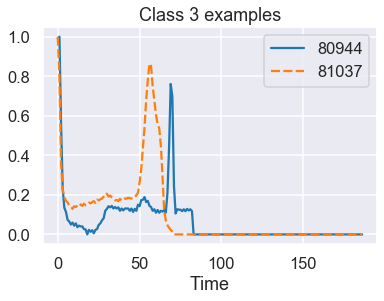

In [10]:
plot_class(3, 2)

Fusion of ventricular and normal beat: class 3. Everything compressed towards the front of the beat.

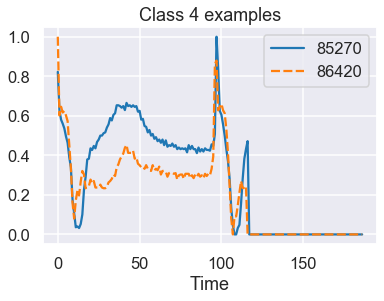

In [11]:
plot_class(4, 2)

Finally, the unclassifiable beats: class 4. Each sample seems to deviate from the next significantly, which makes sense since these did not fit in any other category. A lot of jagged peaks.